In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data (1).csv


In [5]:
df = pd.read_csv("Wholesale customers data (1).csv")

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Task1: Task 1: Data Exploration     
Load the dataset and inspect all available features.      
Identify which columns represent customer purchasing behavior.      
Remove or ignore columns that are not directly related to spending patterns. **bold text**

In [8]:
import pandas as pd
print(df.head())
print(df.info())
print(df.describe())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

Purchasing behavior columns:      
Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

Remove columns:
Channel, Region

Task 2: Feature Selection              
Select suitable numerical features that can represent customer buying habits.          
Justify your feature selection briefly.

In [9]:

X = df.drop(columns=["Channel", "Region"])


print(X.columns)


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')


**Selected Features:**
Fresh            
Milk               
Grocery           
Frozen            
Detergents_Paper               
Delicassen              



**Justification**

These features directly represent customer purchasing behavior

All are continuous numerical values

Suitable for distance-based clustering

Capture diversity in buying patterns across product categories


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


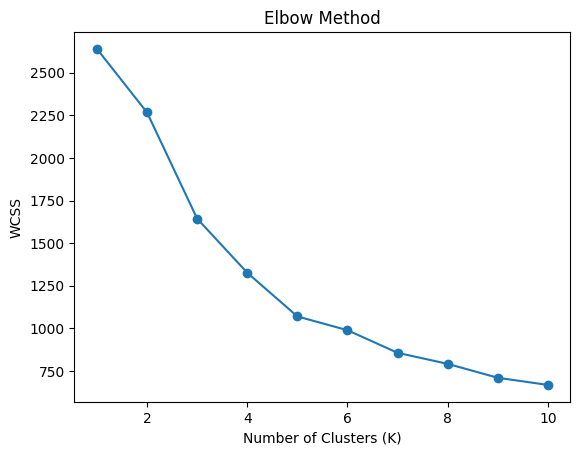

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


df["Cluster"] = y_kmeans
print(df.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        3  
1        1776        0  
2        7844        0  
3        1788        3  
4        5185        1  


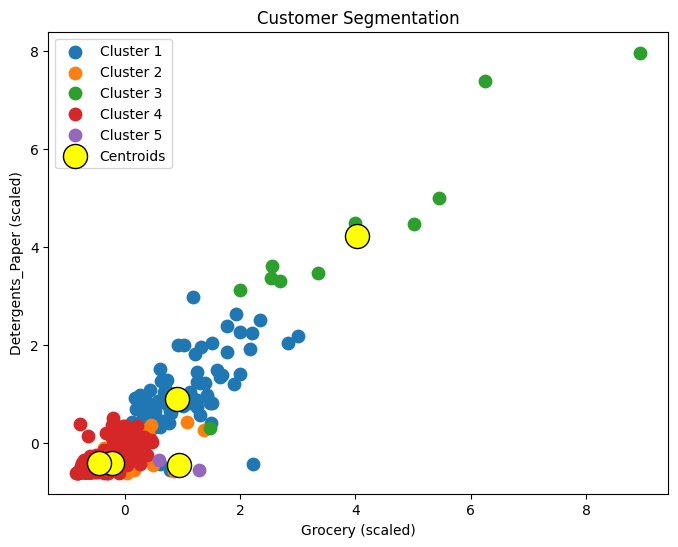

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(X_scaled[y_kmeans == 0, 2], X_scaled[y_kmeans == 0, 4], s=80, label="Cluster 1")
plt.scatter(X_scaled[y_kmeans == 1, 2], X_scaled[y_kmeans == 1, 4], s=80, label="Cluster 2")
plt.scatter(X_scaled[y_kmeans == 2, 2], X_scaled[y_kmeans == 2, 4], s=80, label="Cluster 3")
plt.scatter(X_scaled[y_kmeans == 3, 2], X_scaled[y_kmeans == 3, 4], s=80, label="Cluster 4")
plt.scatter(X_scaled[y_kmeans == 4, 2], X_scaled[y_kmeans == 4, 4], s=80, label="Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,2],
            kmeans.cluster_centers_[:,4],
            s=300, c='yellow', edgecolors='black', label='Centroids')

plt.xlabel("Grocery (scaled)")
plt.ylabel("Detergents_Paper (scaled)")
plt.title("Customer Segmentation")
plt.legend()
plt.show()


In [15]:
cluster_profile = df.groupby("Cluster").mean()
print(cluster_profile)


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.906250  2.520833   5509.250000  10555.635417  16477.927083   
1        1.135593  2.677966  34188.627119   4850.576271   5870.000000   
2        2.000000  2.545455  16911.090909  34864.363636  46126.181818   
3        1.132353  2.522059   9112.235294   2965.404412   3783.702206   
4        1.000000  2.500000  34782.000000  30367.000000  16898.000000   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         1420.125000       7199.406250   1658.791667  
1         7215.559322        955.847458   2491.796610  
2         3245.454545      23008.090909   4177.363636  
3         2413.591912        976.908088    974.926471  
4        48701.500000        755.500000  26776.000000  


In [16]:
for i in range(5):
    print(f"\nCluster {i} Insights:")
    print(cluster_profile.loc[i])



Cluster 0 Insights:
Channel                 1.906250
Region                  2.520833
Fresh                5509.250000
Milk                10555.635417
Grocery             16477.927083
Frozen               1420.125000
Detergents_Paper     7199.406250
Delicassen           1658.791667
Name: 0, dtype: float64

Cluster 1 Insights:
Channel                 1.135593
Region                  2.677966
Fresh               34188.627119
Milk                 4850.576271
Grocery              5870.000000
Frozen               7215.559322
Detergents_Paper      955.847458
Delicassen           2491.796610
Name: 1, dtype: float64

Cluster 2 Insights:
Channel                 2.000000
Region                  2.545455
Fresh               16911.090909
Milk                34864.363636
Grocery             46126.181818
Frozen               3245.454545
Detergents_Paper    23008.090909
Delicassen           4177.363636
Name: 2, dtype: float64

Cluster 3 Insights:
Channel                1.132353
Region              

High Grocery + Detergents → Retail buyers

High Fresh + Frozen → HoReCa customers

Low overall → Price-sensitive customers

In [17]:

kmeans_alt = KMeans(n_clusters=5, init="k-means++", random_state=99)
df["Cluster_Alt"] = kmeans_alt.fit_predict(X_scaled)


print(pd.crosstab(df["Cluster"], df["Cluster_Alt"]))


Cluster_Alt    0  1   2   3  4
Cluster                       
0             71  0  23   2  0
1              0  3   0  55  1
2              0  1  10   0  0
3            228  0   0  44  0
4              0  1   0   0  1


K-Means is sensitive to:

Initial centroid placement

Outliers

Choice of K